# Тестирование инварианта для обратного преобразования Фурье, частоты в Герцах

$\hat{f(\xi)} = \int_{-\infty}^{\infty}e^{2\pi ix\xi}f(x)dx$,

инвариант прямого преобразования Фурье такого вида: $f(x) = e^{-x^2\pi}$, константа: 1$

инвариант обратного преобразования Фурье такого вида: $f(x) = e^{-\xi^2\pi}$, константа: 1$

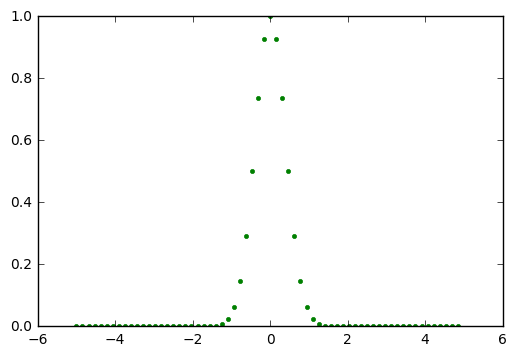

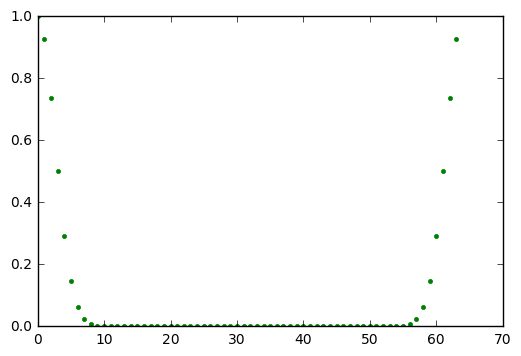

/home/basil/anaconda3/lib/python3.5/site-packages/numpy/core/numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


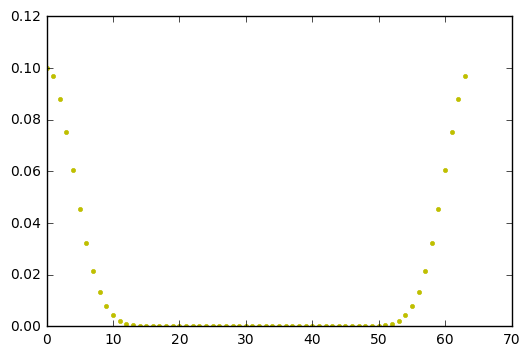

In [26]:
import numpy as np
from numpy import fft
from scipy import integrate
from matplotlib import pyplot as plt

M = 2**6
xi_space = np.linspace(-5, 5, num = M, endpoint = False)
dxi = abs(xi_space[1] - xi_space[0])
f = np.exp(- np.pi * (xi_space * xi_space))

plt.plot(xi_space, f, 'g.')
plt.show()


plt.plot(fft.fftshift(f), 'g.')
plt.show()


f_hat = fft.ifft(fft.fftshift(f))

plt.plot(f_hat, 'y.')
plt.show()


# # в этом преобразовании Фурье xi = l/(M*dx), откуда тогда d\xi = 1/(M*dx)
# # следовательно  dx = 1 / (M * d\xi), тогда x = k / (M * d\xi)
# x_space = np.linspace(0, 1/dxi, num=M, endpoint = False)

# # offset_factor = np.exp(-2*np.pi*1j* (M//2) * dx * xi_space )
#          #f_hat = offset_factor * f_hat

# # Рисуем только те же значения xi, для которых мы определяли функцию по x, 
# # чтобы сравнение картинок получилось наглядным
# # Мы не использовали сдвиг ответа, но это то, что нужно сделать, если потом нужно применять не ifft

# plt.plot(xi_space[(xi_space>-10) & (xi_space<10)], f_hat.real[(xi_space>-10) & (xi_space<10)], 'b.')
# plt.show()

# # мнимая часть мала, но есть. Можно раскомментировать, чтобы на неё посмотреть.
# # plt.plot(xi_space[(xi_space>-10) & (xi_space<10)], f_hat.imag[(xi_space>-10) & (xi_space<10)], 'r.')
# # plt.show()

Мы задаём промежуток от -10 до 10, на котором определяем функцию $f(x)$. Выбираем на промежутке $M+1$ точку, отбрасываем последнюю и смотрим на шаг по $x$, который обозначаем $dx$.

Считаем от набора, который представляет из себя эту функцию, библиотечное преобразование Фурье.

1. Известно, что оно не включает множитель $dx$, поэтому корректируем результат соответственно.

2. Определяем спектр частот и достаём массив $\xi_l$.

3. Для того, чтобы скорректировать сдвиг функции $f$ влево на $x_0 = \frac{M}{2} dx$, используя теорему о сдвиге, домножим результат на $e^{-2\pi i (\frac{M}{2} dx) \xi_l }$

4. Выберем нужное подмножество точек, чтобы увидеть сравнимые графики. Более точное сравнение включает интерполяцию, нежелательную для этого простого примера.



Замечание: разберёмся, куда девается множитель $\sqrt{\pi}$, который должен возникать при вычислении интеграла Пуассона. Короткий ответ - погашается обратным при замене.

Напомним, что

$$\hat{f(\xi)} = \int_{-\infty}^{\infty}e^{2\pi ix\xi}f(x)dx$$, действуя на $f(x) = e^{-x^2\pi}$, принимает вид

$\hat{f(\xi)} = 
\int_{-\infty}^{\infty}e^{2\pi ix\xi} e^{-x^2\pi}dx = 
\int_{-\infty}^{\infty}e^{2\pi ix\xi - x^2\pi}dx = 
\int_{-\infty}^{\infty}e^{-x^2\pi + 2\pi ix\xi - (i\xi)^2\pi + (i\xi)^2\pi}dx = 
\int_{-\infty}^{\infty}e^{-(x\sqrt{\pi} - i\xi\sqrt{\pi})^2 - \xi^2\pi}dx = 
e^{-\xi^2\pi}\int_{-\infty}^{\infty}e^{-(x\sqrt{\pi} - i\xi\sqrt{\pi})^2}dx =
\color{blue}{// t = x\sqrt{\pi} - i\xi\sqrt{\pi}, dt = \sqrt{\pi}dx//}=
e^{-\xi^2\pi} \cdot \sqrt{\pi}$

В силу равнозрачности $x$ и $\xi$ в таком представлении, соответственные выкладки справедливы и случая, когда 
$$f(x) = \int_{-\infty}^{\infty}e^{2\pi ix\xi}\hat{f(\xi)}dx$$, действует на $f(\xi) = e^{-\xi^2\pi}$